In [25]:
import pandas as pd

df = pd.read_csv("../data/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [26]:
# Ta bort Mega-former (Jag vill bara ha vanliga Pokémon)
df = df[~df["Name"].str.contains("Mega", na=False)]

# Ta bort rader med saknade värden
df = df.dropna(subset=["Type 1", "HP", "Attack", "Defense", "Speed"])

df.shape  # Visa antal rader och kolumner

(751, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           751 non-null    int64 
 1   Name        751 non-null    object
 2   Type 1      751 non-null    object
 3   Type 2      375 non-null    object
 4   Total       751 non-null    int64 
 5   HP          751 non-null    int64 
 6   Attack      751 non-null    int64 
 7   Defense     751 non-null    int64 
 8   Sp. Atk     751 non-null    int64 
 9   Sp. Def     751 non-null    int64 
 10  Speed       751 non-null    int64 
 11  Generation  751 non-null    int64 
 12  Legendary   751 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 77.0+ KB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [29]:
matches = []
labels = []

for _ in range(5000):
    p1 = df.sample(1).iloc[0]
    p2 = df.sample(1).iloc[0]

    stats1 = [p1["HP"], p1["Attack"], p1["Defense"], p1["Sp. Atk"], p1["Sp. Def"], p1["Speed"]]
    stats2 = [p2["HP"], p2["Attack"], p2["Defense"], p2["Sp. Atk"], p2["Sp. Def"], p2["Speed"]]


    matches.append(stats1 + stats2) # kombinerar statsen för båda Pokémon
    labels.append(0 if sum(stats1) > sum(stats2) else 1) # 0 = p1 vinner, 1 = p2 vinner

In [30]:
x = np.array(matches)
y = np.array(labels)

# Normalisera värden
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Dela upp data i träning/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Träning av modellen
model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy: .2f}")

# Skriv ut en rapport
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model accuracy:  0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       487
           1       0.94      0.95      0.95       513

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



Cross-validation accuracy: 0.95 (+/- 0.01)


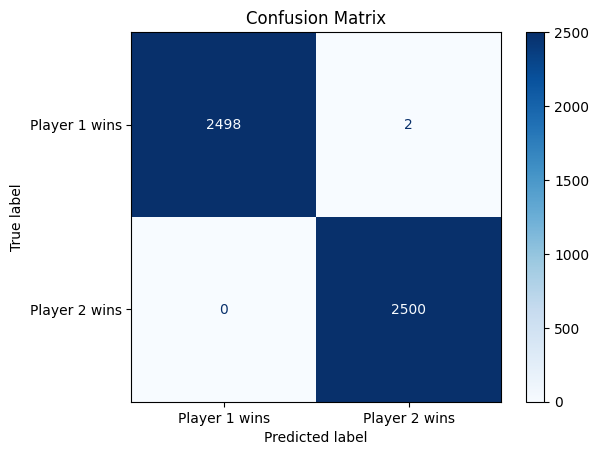

In [31]:
# Cross-validation
cv_scores = cross_val_score(model, x_scaled, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")

# Träna modellen igen
model.fit(x_scaled, y)
y_pred = model.predict(x_scaled)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Player 1 wins", "Player 2 wins"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
os.makedirs("data", exist_ok=True)

# Spara modellen som .pkl
with open("data/model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("data/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved to data/scaler.pkl")

print("Model saved to data/model.pkl")

Scaler saved to data/scaler.pkl
Model saved to data/model.pkl


: 